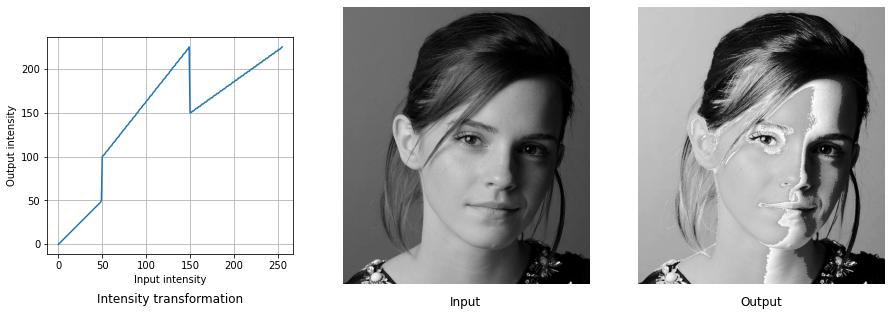

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
array1 = np.linspace(0,50,50)
array2 = np.linspace(100,225,100)
array3 = np.linspace(150,225,106)

array_final = np.concatenate((array1,array2,array3)).astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(15,10))
ax[0].plot(array_final)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.25)
img2 = cv.LUT(img,array_final)
ax[1].imshow(img,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Input",y=-0.1)
ax[2].imshow(img2,cmap='gray')
ax[2].axis("off")
ax[2].set_title("Output",y=-0.1)
plt.show()


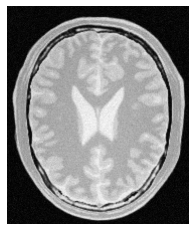

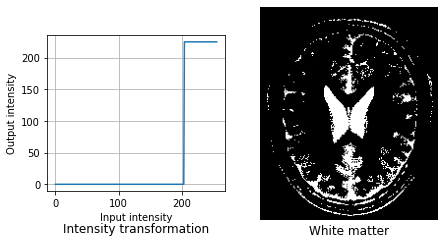

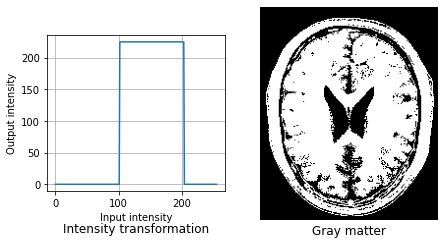

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
fig,ax=plt.subplots()
ax.imshow(img,cmap='gray')
plt.axis("off")
w_array1 = np.linspace(0,0,204)
w_array2 = np.linspace(225,225,52)
g_array1 = np.linspace(0,0,102)
g_array2 = np.linspace(225,225,102)
g_array3 = np.linspace(0,0,52)

array_w= np.concatenate((w_array1,w_array2)).astype(np.uint8)
array_g= np.concatenate((g_array1,g_array2,g_array3)).astype(np.uint8)
fig,ax = plt.subplots(1,2,figsize=(7,7))
ax[0].plot(array_w)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.3)
imgW = cv.LUT(img,array_w)
ax[1].imshow(imgW,cmap='gray')
ax[1].axis("off")
ax[1].set_title("White matter",y=-0.1)
plt.show()
fig,ax = plt.subplots(1,2,figsize=(7,7))
ax[0].plot(array_g)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.3)
imgG = cv.LUT(img,array_g)
ax[1].imshow(imgG,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Gray matter",y=-0.1)
plt.show()

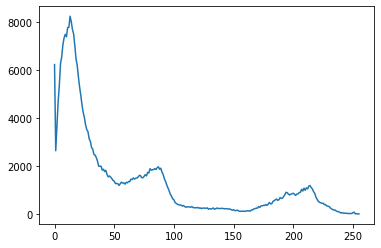

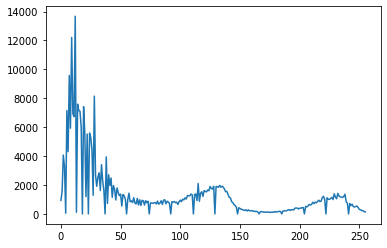

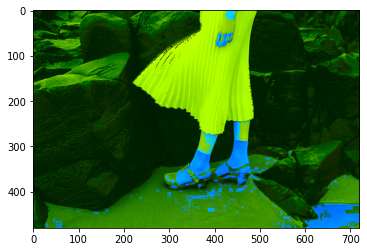

In [61]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
img_hist = cv.calcHist([img],[0],None,[256],[0,256])
f,a = plt.subplots()
a.plot(img_hist)
plt.show()
img = cv.cvtColor(img,cv.COLOR_BGR2Lab)
L,a,b = cv.split(img)


gamma = 0.99
t_L = np.array([p/255**gamma*255 for p in range(0,256)]).astype(np.uint8)
L_new=cv.LUT(L,t_L)

gamma = 1.1
t_a = np.array([p/255**gamma*255 for p in range(0,256)]).astype(np.uint8)
a_new=cv.LUT(a,t_a)

gamma = 0.9
t_b = np.array([p/255**gamma*255 for p in range(0,256)]).astype(np.uint8)
b_new=cv.LUT(b,t_b)

img2= cv.merge([L_new,a_new,b_new])
img_hist = cv.calcHist([img2],[0],None,[256],[0,256])
f,a = plt.subplots()
a.plot(img_hist)
plt.show()
img2=cv.cvtColor(img2,cv.COLOR_Lab2RGB)
img=cv.cvtColor(img,cv.COLOR_Lab2RGB)
fig,ax= plt.subplots()
ax.imshow(img2)